Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics
 

In [13]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

In [14]:
#import dataframe
df = pd.read_csv("baseball.csv")
print(df.shape)
df

(30, 17)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [15]:
# removing duplicates 
df = df.drop_duplicates(keep='first')


In [16]:
# Printing the head of data
df.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [17]:
# Checking the columns of the dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [18]:
# Checking the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


####  no nulls , no duplicates , and all the data belong to integer and float categories 

In [19]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Key Observation

There is sometimes mean is greater than median and sometimes median is greater than mean

EDA: Exploratory Data Analysis Exploring Data Variable

Target/Dependent variable is continues in nature


In [20]:
# Checking for NaN values
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

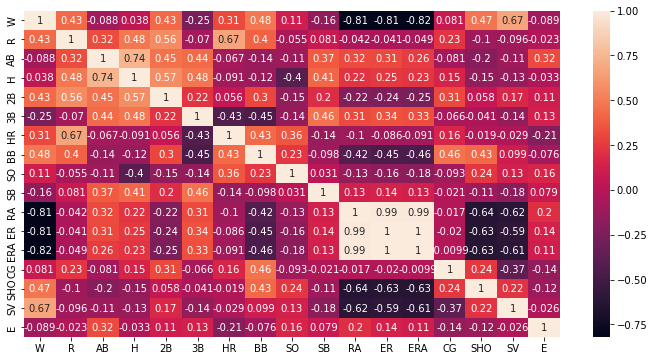

In [21]:
df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### correlation is present

### Plotting Outliers

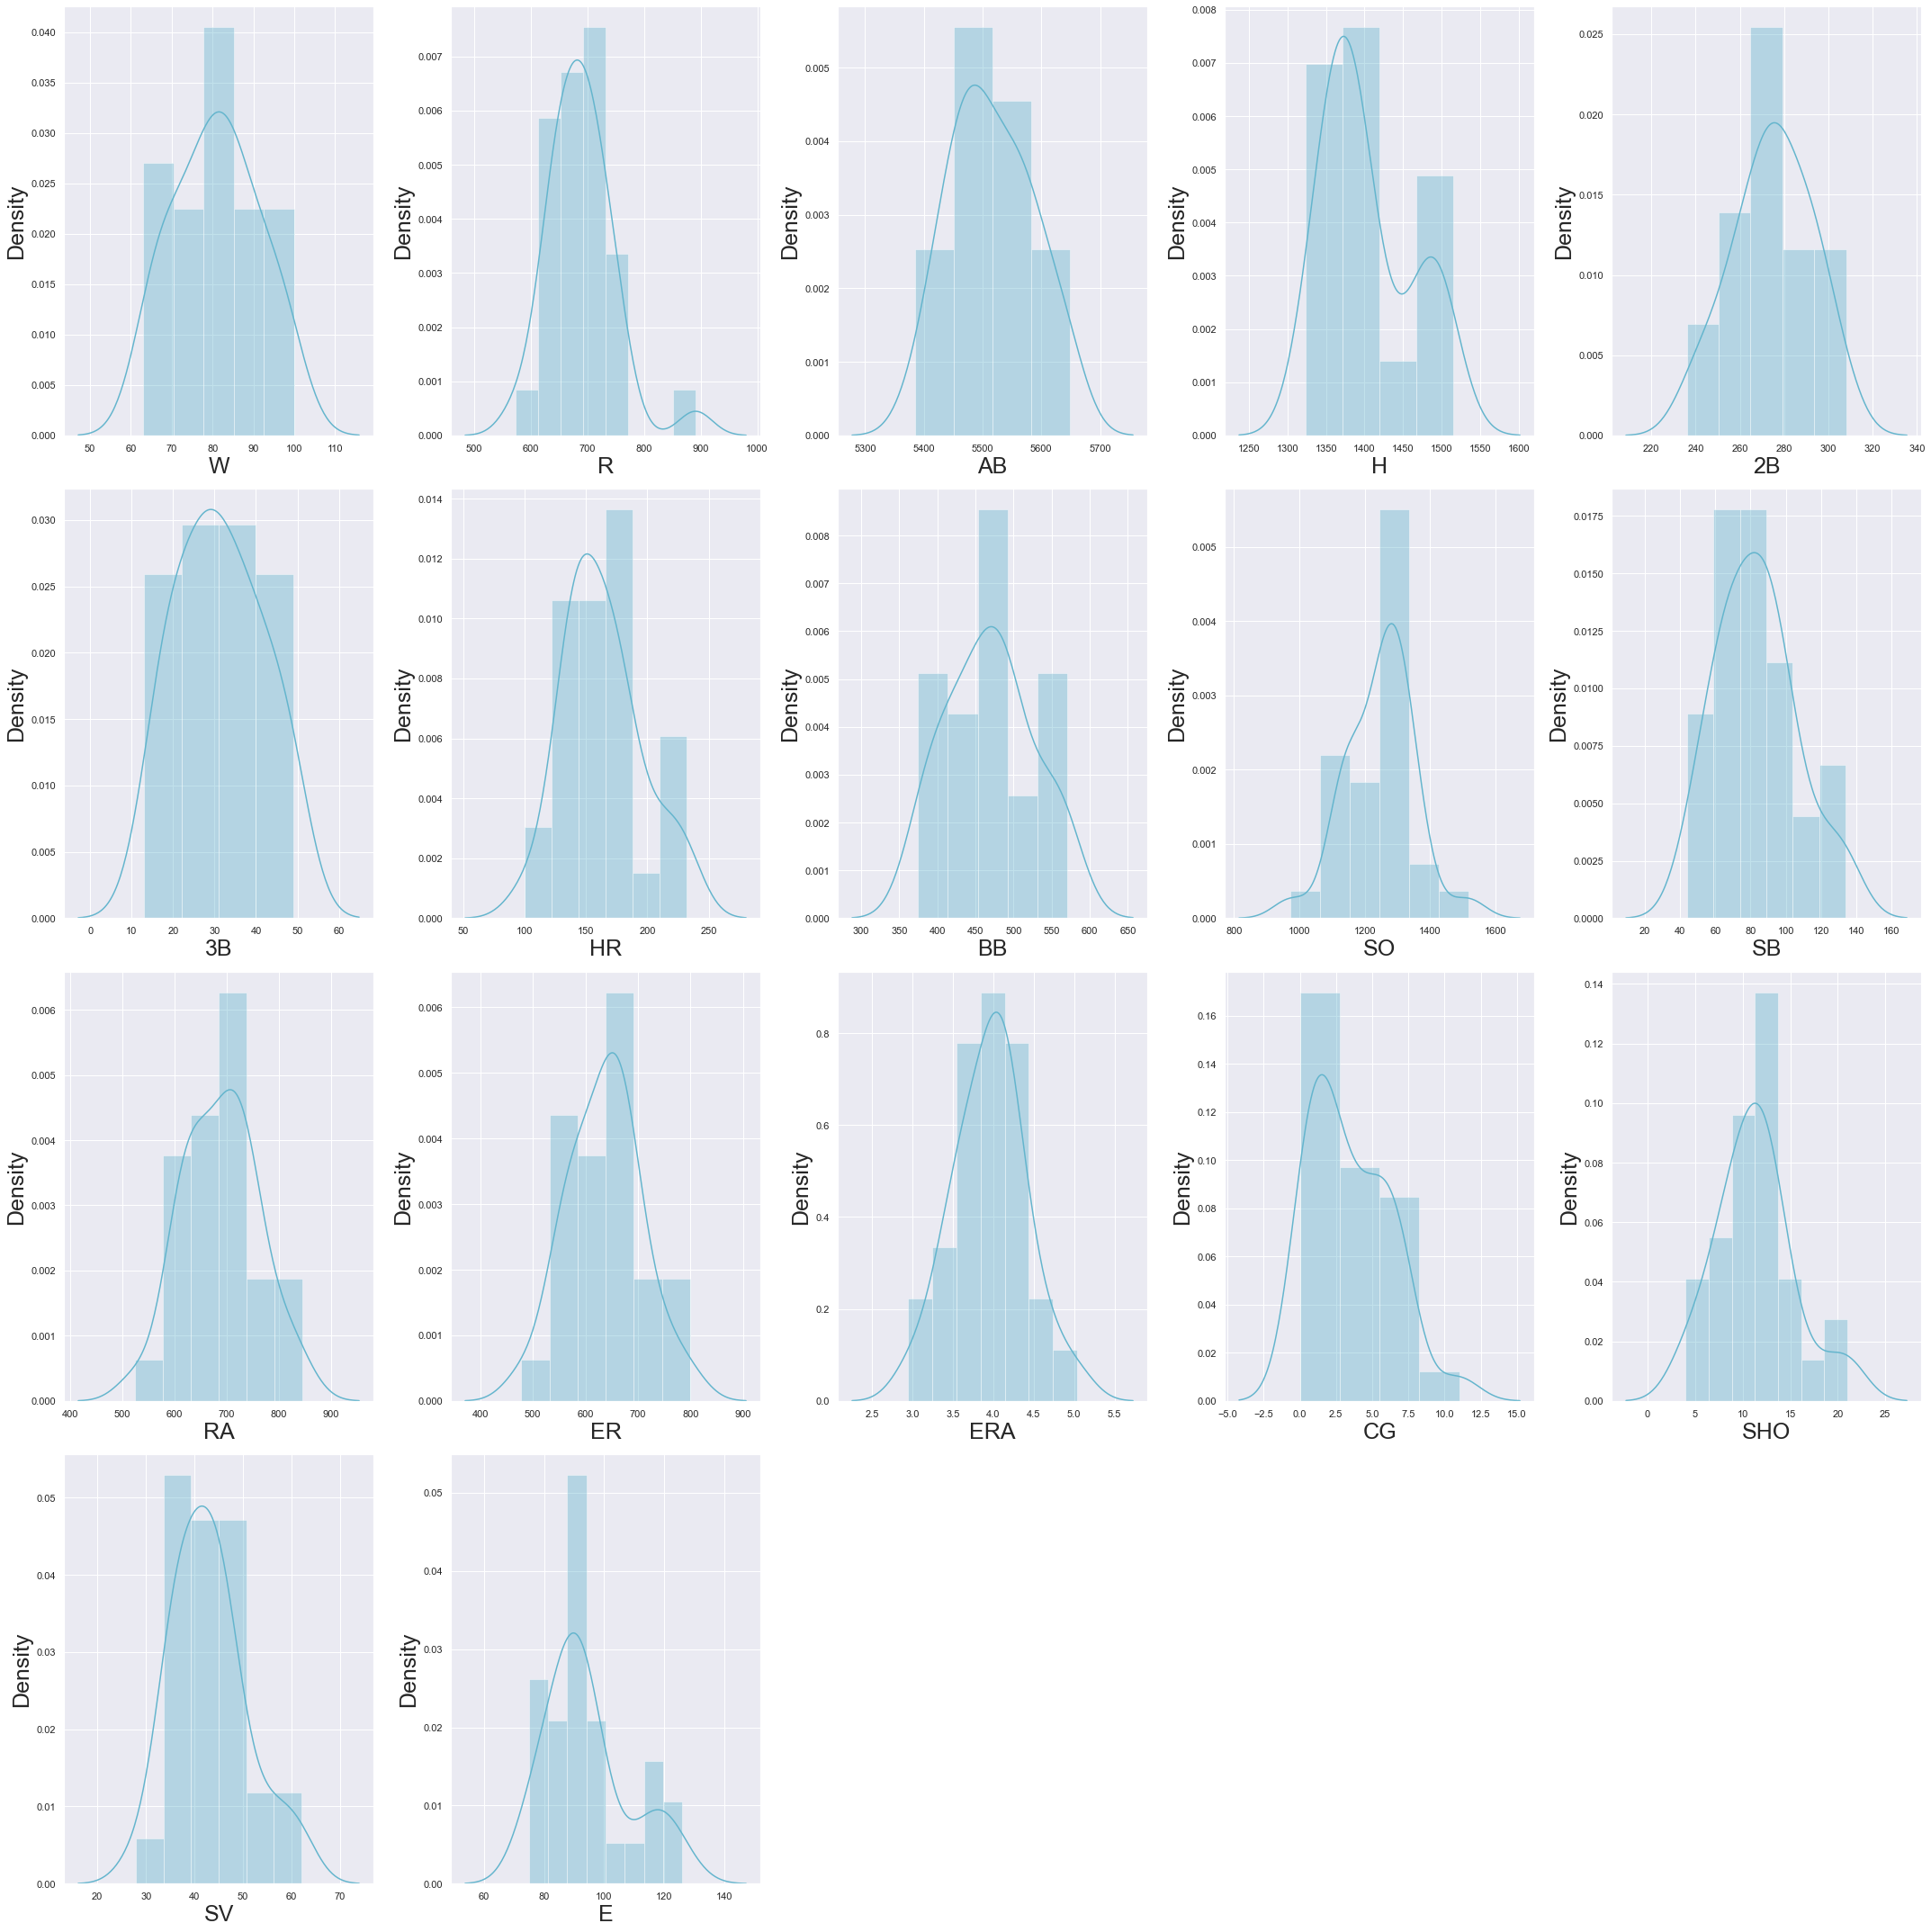

In [42]:
#Distribution plot for all numerical columns
columns=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
sns.set(style="darkgrid")

plt.figure(figsize = (30,30))
plotnumber = 1
for column in df[columns]:
    if plotnumber <=20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(df[column],color='c')
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
    plotnumber+=1
plt.tight_layout()

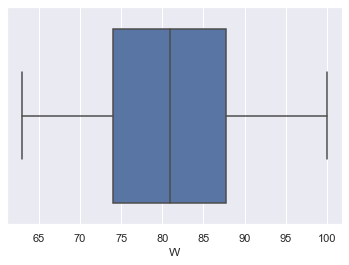

In [28]:
sns.boxplot(df['W'])
plt.show()

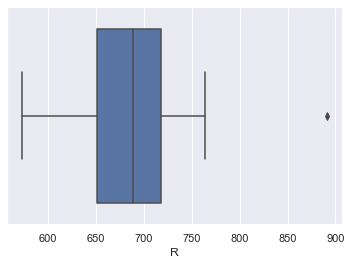

In [29]:
sns.boxplot(df['R'])
plt.show()

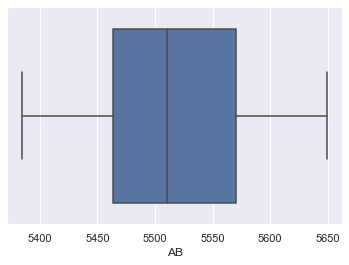

In [30]:
sns.boxplot(df['AB'])
plt.show()

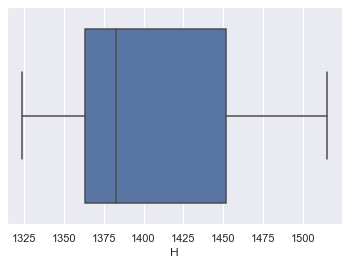

In [31]:
sns.boxplot(df['H'])
plt.show()

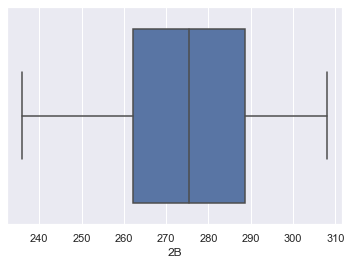

In [32]:
sns.boxplot(df['2B'])
plt.show()

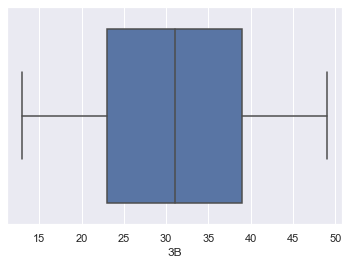

In [33]:
sns.boxplot(df['3B'])
plt.show()

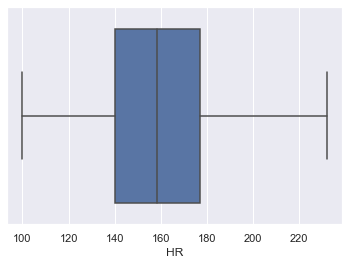

In [34]:
sns.boxplot(df['HR'])
plt.show()

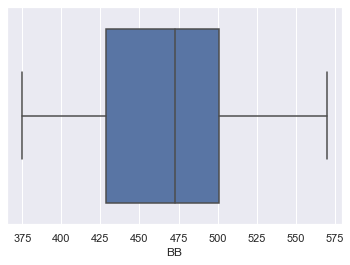

In [35]:
sns.boxplot(df['BB'])
plt.show()

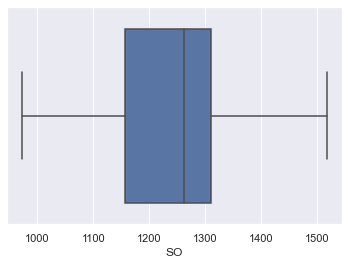

In [36]:
sns.boxplot(df['SO'])
plt.show()

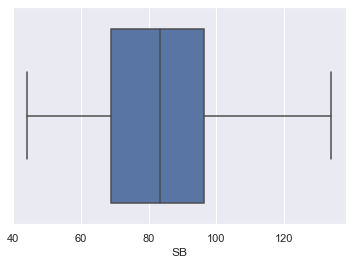

In [37]:
sns.boxplot(df['SB'])
plt.show()

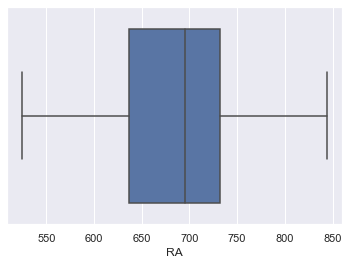

In [38]:
sns.boxplot(df['RA'])
plt.show()

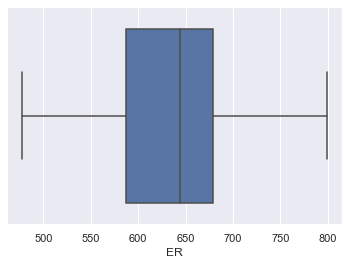

In [40]:
sns.boxplot(df['ER'])
plt.show()

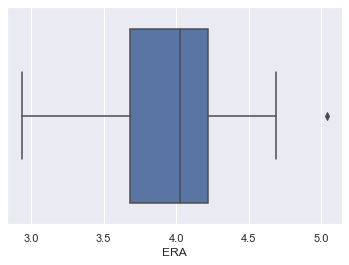

In [41]:
sns.boxplot(df['ERA'])
plt.show()

In [43]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [45]:
# Removing skewness of data
for col in df.columns:
    if df.skew().loc[col] > 0.55:
        df[col] = np.log1p(df[col])

In [46]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

In [47]:
# Removing skewness of data
for i in range(1, 15):
    for col in df.columns:
        if df.skew().loc[col] > 0.55:
            df[col] = np.log1p(df[col])

In [48]:
df.skew()

W      0.047089
R      0.641304
AB     0.183437
H      0.619511
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.547824
dtype: float64

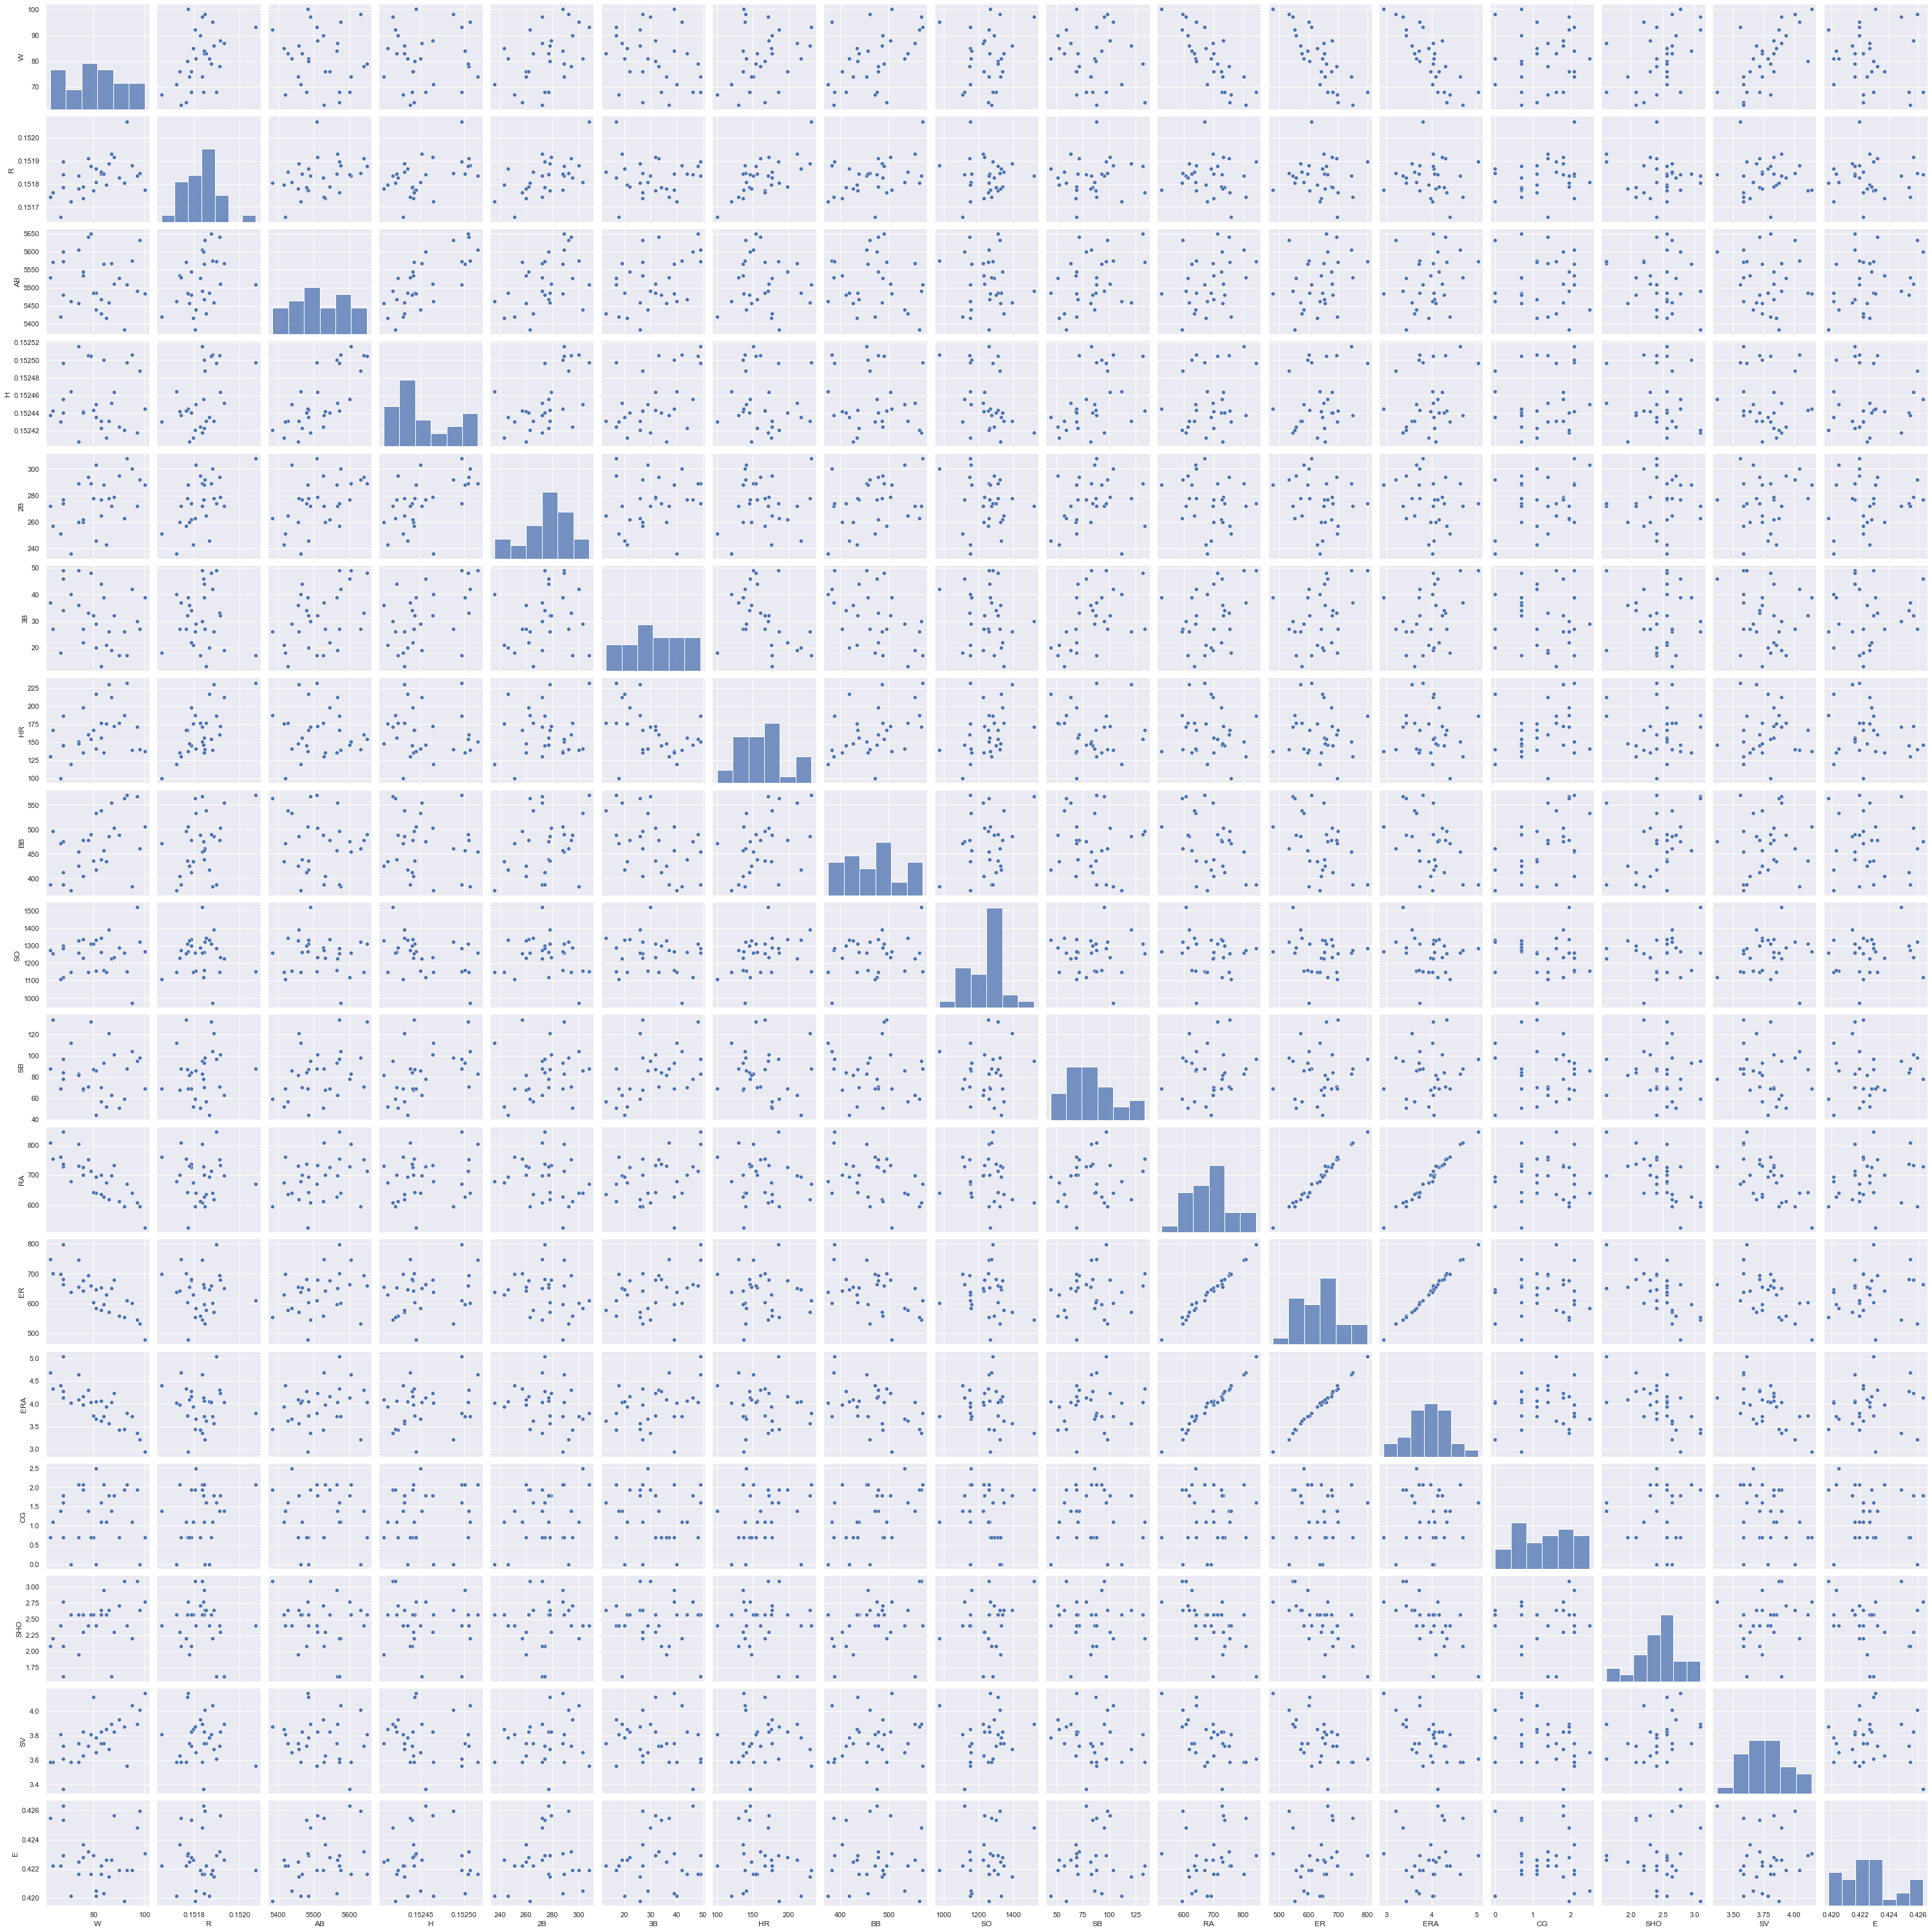

In [50]:
sns.pairplot(df)
plt.show()

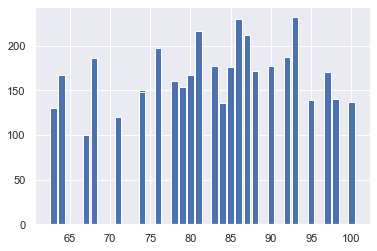

In [51]:
plt.bar(df['W'], df['HR'])
plt.show()

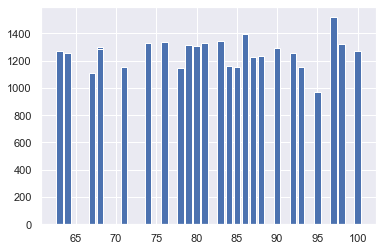

In [52]:
plt.bar(df['W'], df['SO'])
plt.show()

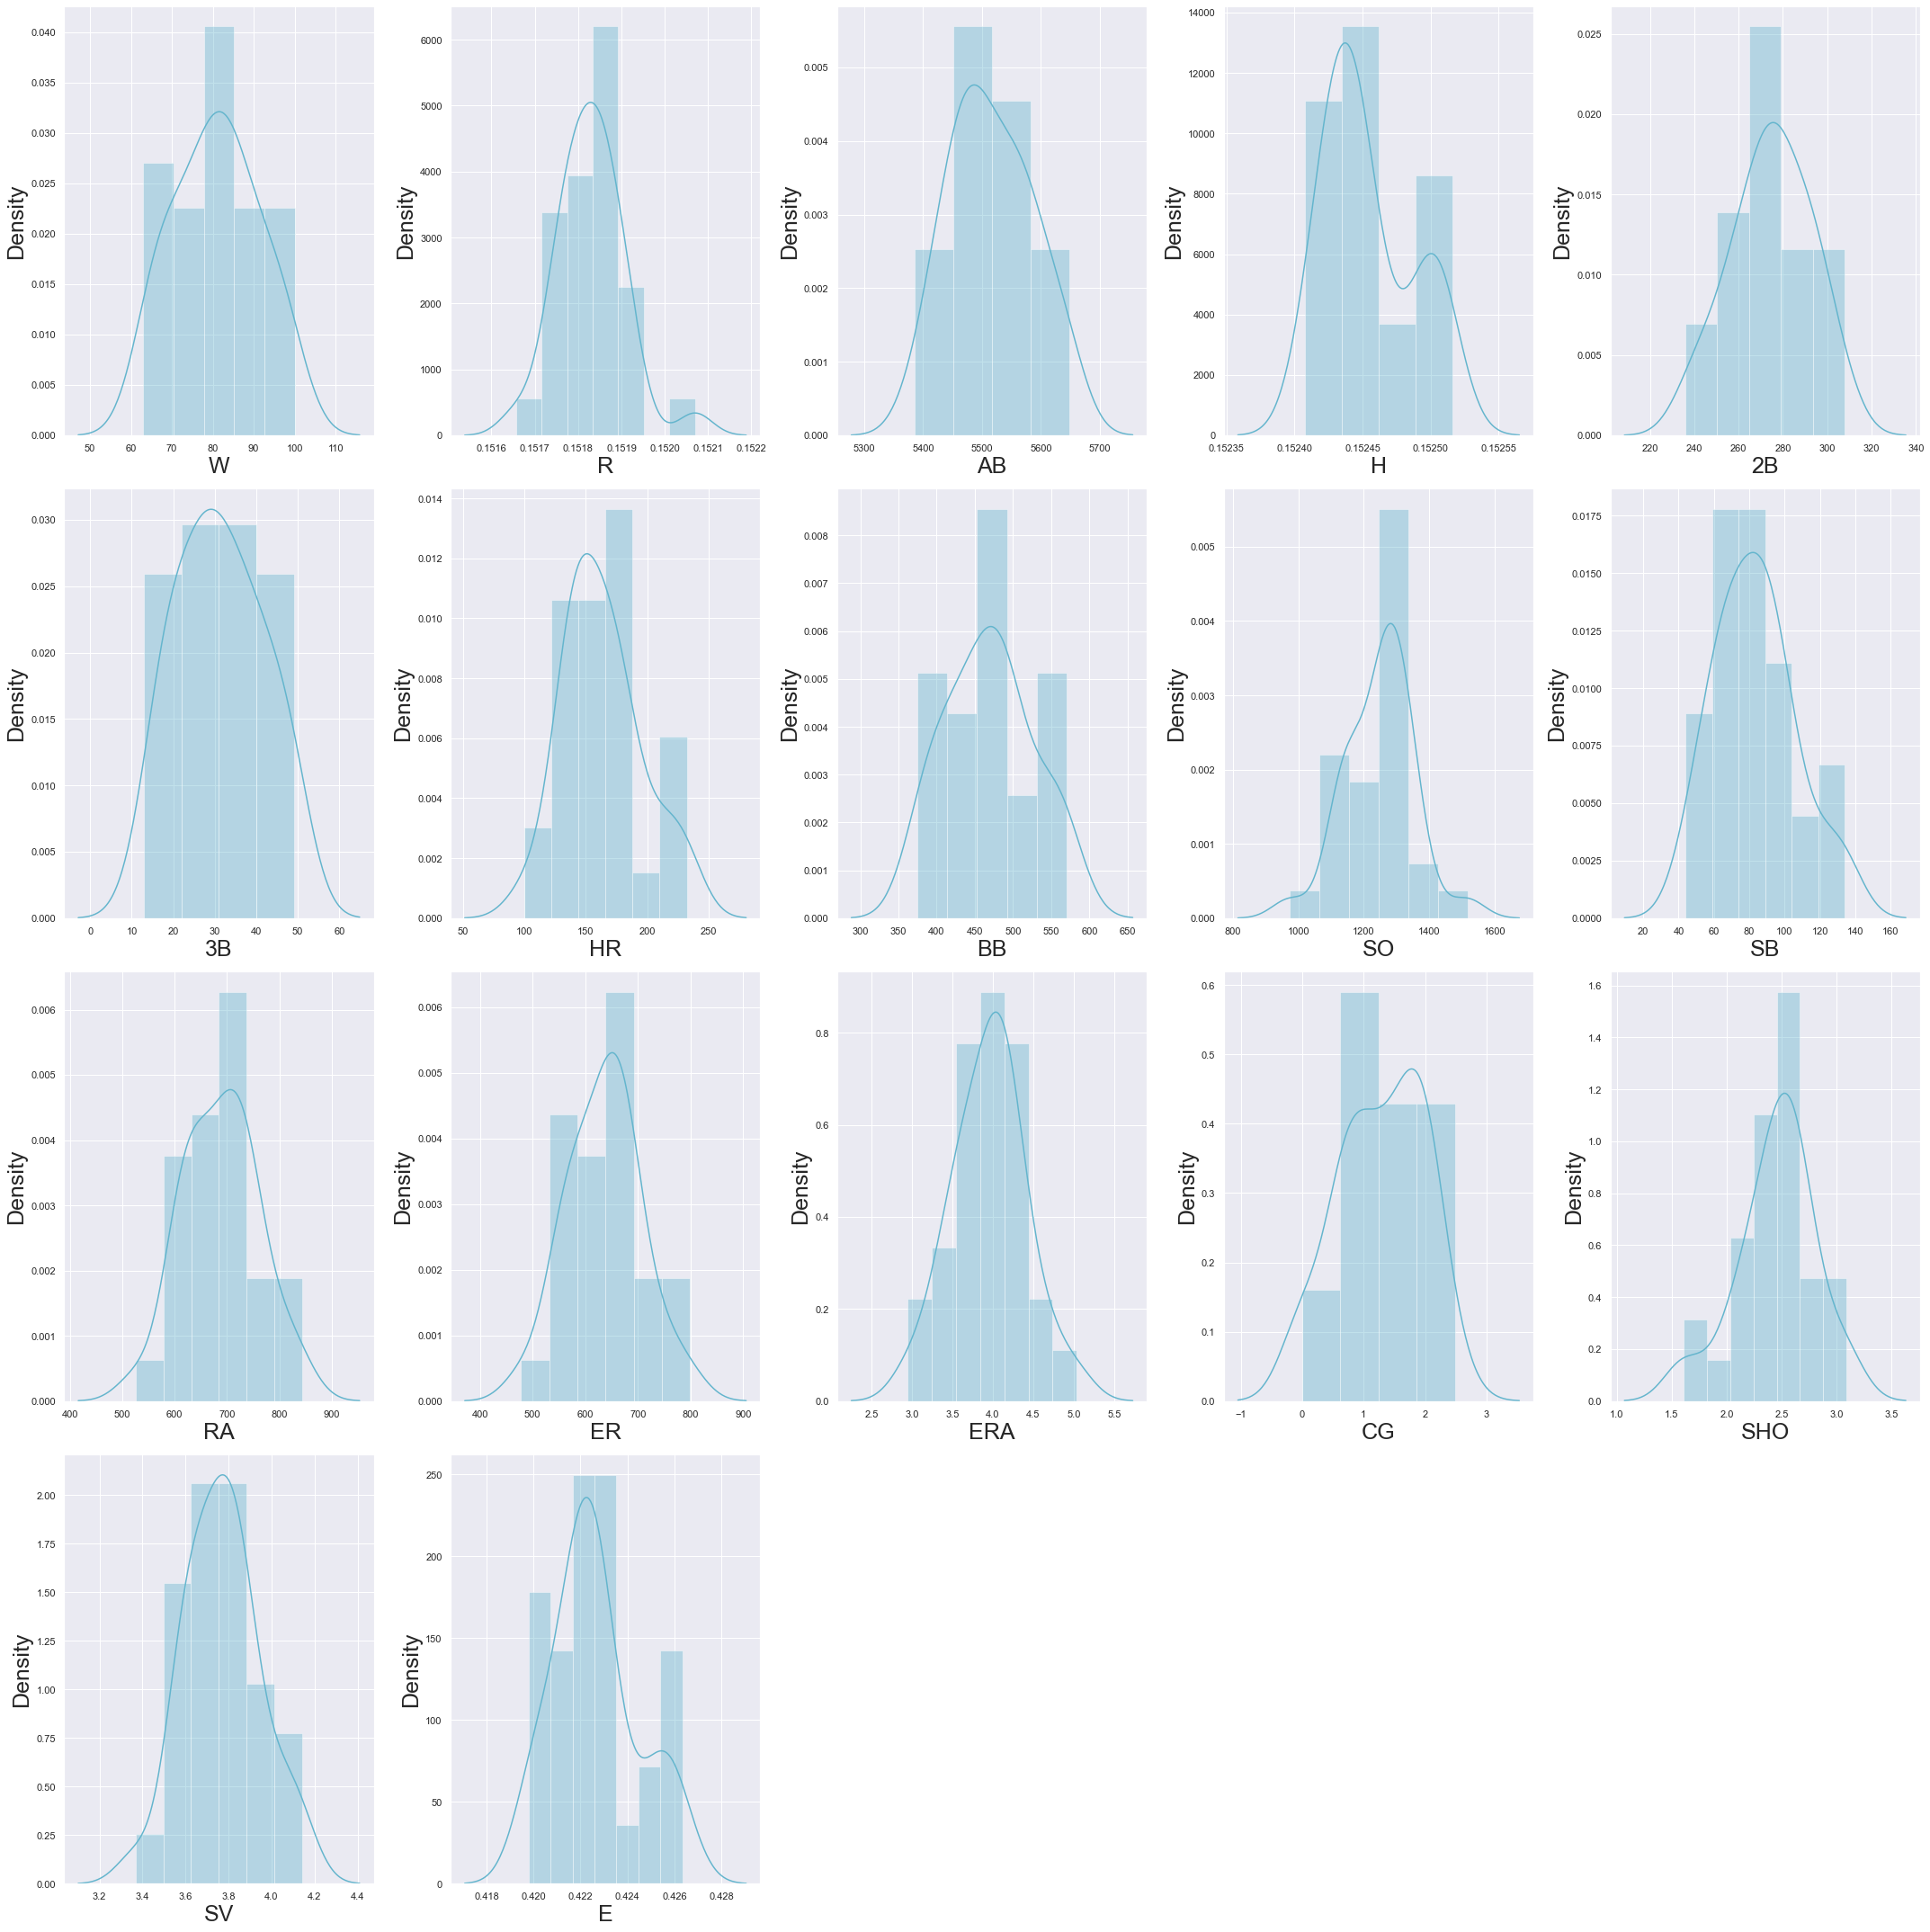

In [53]:
#Distribution plot for all numerical columns
columns=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
sns.set(style="darkgrid")

plt.figure(figsize = (30,30))
plotnumber = 1
for column in df[columns]:
    if plotnumber <=20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(df[column],color='c')
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
    plotnumber+=1
plt.tight_layout()

In [54]:
# CHecking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(df))
print ('Before removing zscore: ', df.shape)

df_final = df.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", df_final.shape)

Before removing zscore:  (30, 17)
After removing zscore:  (29, 17)


In [56]:
# Assigning the input and output data
df_x = df_final.drop(columns = ['W'])
y = df_final['W']

In [57]:
df_x.shape

(29, 16)

In [58]:
y.shape

(29,)

In [59]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [60]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.950531,0.830084,1.720533,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.722413,1.554812,-0.422789
1,0.362436,-0.702831,-0.952194,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.312085,0.296229,-0.590675
2,-0.233039,-1.100253,-0.084828,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.157879,-0.672787,-1.220943
3,-1.344149,0.233951,-0.345091,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.426009,-0.825263,0.559525
4,0.210832,1.255894,2.023649,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.312085,-1.142637,-0.590675
5,1.743642,0.716535,-0.047906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.186270,-2.375997,0.667088,-0.023944
6,0.722901,-0.447345,-0.551839,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.869855,-0.157879,0.035297,-1.414553
7,-0.811551,-0.447345,-0.307715,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.841793,0.312085,1.952930,0.127870
8,1.432687,1.752672,1.686581,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.186270,-0.157879,-0.379227,0.275592
9,1.491612,-0.078310,0.354048,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.787648,-0.426009,0.296229,1.678051


In [61]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [66]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x, y)


Max r2 score corresponding to  73  is:  0.841967092512024


In [67]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1,27)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x, y)
gknr.best_params_

{'n_neighbors': 5}

In [68]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors =5)
r_state = max_r2_score(knr, x, y)


Max r2 score corresponding to  44  is:  0.822533333333333


In [69]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  -0.04153929493639963
Standard deviation for r2 score in linear regression:  0.6157973199764974

*****************

Mean r2 score for KNN regression:  0.013948823210868965
Standard deviation for r2 score in KNN regression:  0.7978211142053168


In [70]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x, y)
clf.best_params_

{'alpha': 1}

In [71]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.001)
r_state = max_r2_score (lsreg, x, y)


Max r2 score corresponding to  46  is:  0.9001701767292923


In [72]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  0.23518096739930255
Standard deviation in  r2 score for Lasso Regression:  0.4434250611308529


In [73]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100,150, 200, 250, 300]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 300}

In [74]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate=0.001, n_estimators=100)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  -0.3382050356191545
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.36025013999947364


In [75]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x, y)


Max r2 score corresponding to  46  is:  0.13609859990563555


In [76]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 150, 200, 250, 300], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(),
 'learning_rate': 0.1,
 'n_estimators': 200}

In [77]:
ada_reg = AdaBoostRegressor(base_estimator = lreg, learning_rate=0.1, n_estimators=200)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.4541424112603206
Standard Deviation in  r2 score for Ada Boosting Regression:  0.5947873140241323


In [78]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x, y)


Max r2 score corresponding to  47  is:  0.9680251893020935


In [79]:
# we tried all the models and till now and best model will be selected
# random state corresponding to highest r2 score is 82

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=47, test_size = 0.20)
ada_reg = AdaBoostRegressor(base_estimator = lreg, learning_rate=0.01, n_estimators=200)
ada_reg.fit(x_train, y_train)
y_pred =  ada_reg.predict(x_test)
print (y_pred)

[91.69463918 79.30639997 77.15483738 90.97370485 81.72146746 70.7708967 ]


In [80]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_baseball.csv')

In [81]:
# Lets find RMSE and r2 sciore using sklearn.metrics

print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print ('r2 score is: ', r2_score(y_test, y_pred))

RMSE is:  5.6742440010120365
r2 score is:  0.7449177774232485


In [ ]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(lsreg, 'Prj_Baseball.pkl')
#clf = joblib.load('Prj_Baseball.pkl')
#clf.predict(x_test)